In [1]:
import pod5
import numpy as np
import matplotlib.pyplot as plt
import pgnano.stats_analysis.primitives as pgnprim
import pgnano.stats_analysis.jupyter_data_preparation as pgndata
import statistics as st
import re
import functools

In [2]:
signal_data, chunked_data = pgndata.flatten_sample_data(pgnprim.PGPoreType.P10_4_1, 100)

['/data/datananoraw/data_analysis/10_4_1/2d6ce589-PAG70058_pass_90cff557_229fb1c2_1643.pod5', '/data/datananoraw/data_analysis/10_4_1/58662236-PAG70133_pass_976dfe21_5dadfada_5.pod5', '/data/datananoraw/data_analysis/10_4_1/679e8449-PAG70058_pass_90cff557_229fb1c2_1581.pod5', '/data/datananoraw/data_analysis/10_4_1/7646a9e4-PAG65784_pass_f306681d_16a70748_508.pod5', '/data/datananoraw/data_analysis/10_4_1/889add85-PAG67404_fail_a8a15ce6_4a74c11f_28.pod5', '/data/datananoraw/data_analysis/10_4_1/898fa111-PAG68757_fail_39c39833_26077d5d_167.pod5', '/data/datananoraw/data_analysis/10_4_1/8ba56eeb-PAG65784_pass_f306681d_16a70748_1319.pod5', '/data/datananoraw/data_analysis/10_4_1/a60ded57-PAG65902_pass_96491aed_0156c9a3_1335.pod5', '/data/datananoraw/data_analysis/10_4_1/a7ff4244-PAG68757_pass_39c39833_26077d5d_944.pod5', '/data/datananoraw/data_analysis/10_4_1/af5d6be7-PAG70133_pass_976dfe21_5dadfada_1065.pod5', '/data/datananoraw/data_analysis/10_4_1/c2f433b8-PAG65902_fail_96491aed_0156c

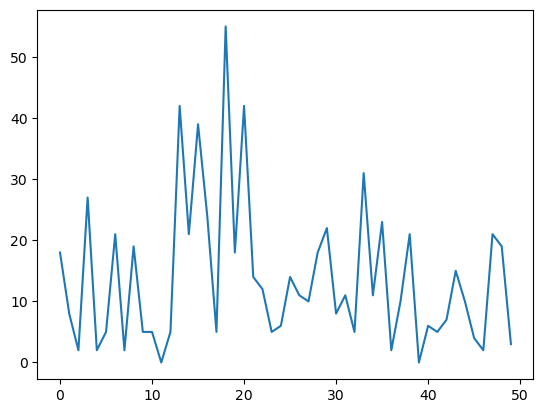

In [3]:
start=2250
size=50
limit=start + size
one_signal = signal_data[0]
prev = 0
predicted_signal = []
for signal in one_signal:
    predicted_signal.append(prev)
    prev = signal
#plt.plot(one_signal[start:limit])
#plt.plot(predicted_signal[start:limit])
error = list(map(lambda x: abs(x[0] - x[1]), zip(one_signal[start:limit], predicted_signal[start:limit])))
plt.plot(error)
#plt.plot(list(map(lambda x: x if x < 20 else 1000, error)))


In [4]:
files = pgndata.get_data(pgnprim.PGPoreType.P9_4_1)
one_file = files[0][0]
print(one_file)

['/data/datananoraw/data_analysis/9_4_1/0792a506-batch11.pod5', '/data/datananoraw/data_analysis/9_4_1/13ccd92f-batch33.pod5', '/data/datananoraw/data_analysis/9_4_1/16723ac7-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/23a8b088-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/3824828f-batch12.pod5', '/data/datananoraw/data_analysis/9_4_1/5524fc3c-batch13.pod5', '/data/datananoraw/data_analysis/9_4_1/6f82bcb6-batch28.pod5', '/data/datananoraw/data_analysis/9_4_1/93f9b40d-batch20.pod5', '/data/datananoraw/data_analysis/9_4_1/9a6e2862-batch36.pod5', '/data/datananoraw/data_analysis/9_4_1/af5138bf-batch7.pod5', '/data/datananoraw/data_analysis/9_4_1/b8feca29-batch25.pod5', '/data/datananoraw/data_analysis/9_4_1/bb5fa810-batch19.pod5', '/data/datananoraw/data_analysis/9_4_1/df68bb8f-batch3.pod5', '/data/datananoraw/data_analysis/9_4_1/e1e34260-batch11.pod5', '/data/datananoraw/data_analysis/9_4_1/e2564fd3-batch22.pod5']
[('/data/datananoraw/data_analysis/9_4_1/af5138bf-batch7

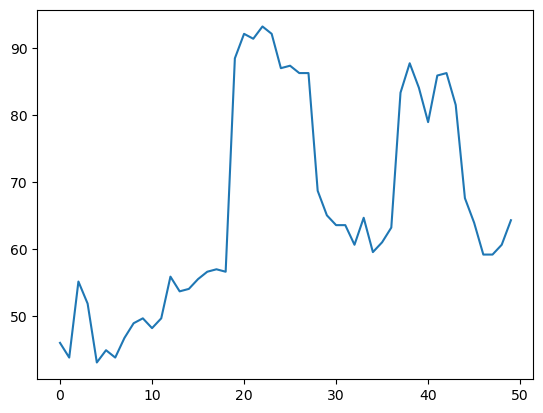

In [5]:
start = 2500
size = 50


reader = pod5.Reader(one_file)
read = next(reader.reads())
read.calibration_digitisation
plt.plot(read.signal_pa[start: start + size])


In [6]:
from itertools import repeat


cummulative_lenght = 32
signal = read.signal
if len(signal) % cummulative_lenght != 0:
    signal = np.append(signal, list(repeat(signal[-1], cummulative_lenght - (len(signal) % cummulative_lenght))))
print(len(signal) % cummulative_lenght)
print(cummulative_lenght - (len(signal) % cummulative_lenght))


0
32


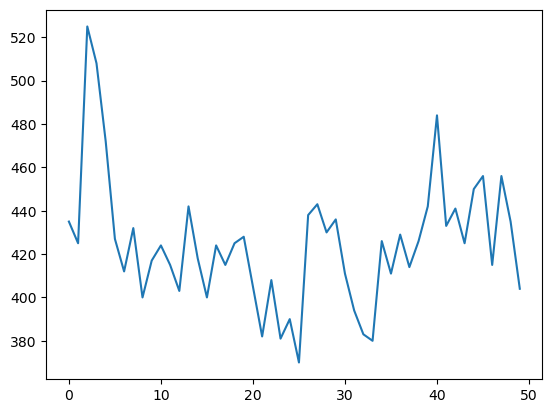

In [7]:
aggregated_signal = []
for i in range(len(signal) // cummulative_lenght):
    aggregated_signal.append(
        st.mean(signal[i*cummulative_lenght:(i+1)*cummulative_lenght])
    )
plt.plot(aggregated_signal[:50])

In [8]:
def parse_levels(path: str):
    res = {}
    with open(path) as h:
        lines = h.readlines()
    for line in lines:
        m = re.match(r'((A|T|C|G)*)\s*(-?(\d+)(\.\d+)?)', line)
        kmer = m.group(1)
        value = float(m.group(3))
        res[kmer] = value
    return res


In [9]:
levels = list(parse_levels('9_4_1_example_levels.txt').values())
plt.scatter(levels,list(repeat(0, len(levels))))

FileNotFoundError: [Errno 2] No such file or directory: '9_4_1_example_levels.txt'

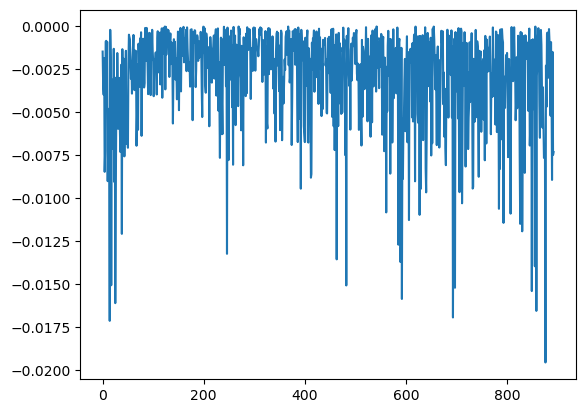

In [ ]:
levels.sort()
diffs = [x-y  for (x,y) in zip(levels[:-1], levels[1:])]
plt.plot(diffs[30:(len(diffs) - 100)])

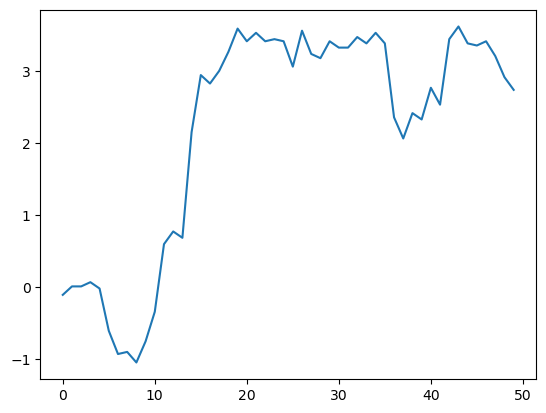

In [ ]:
mean = signal.mean()
stdev = signal.std()
normalized_signal = list(map(lambda x: (x - mean) / stdev, signal))
plt.plot(normalized_signal[50:100])

In [ ]:
def find_closest(x, candidates):
    print(np.array(map(lambda y: x - y, candidates)).argmin())
    return candidates[np.array(map(lambda y: x - y, candidates)).argmin()]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


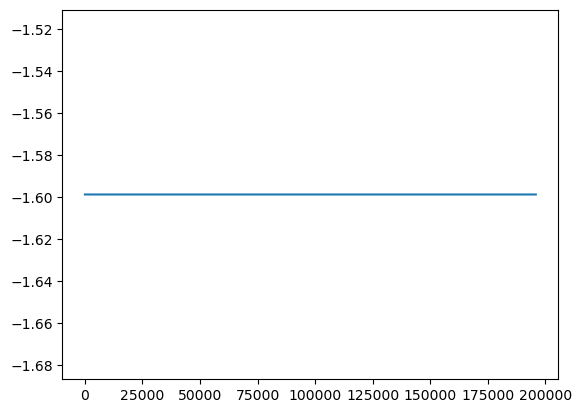

In [ ]:
f = functools.partial(lambda candidates, x: find_closest(x, candidates), levels)
print(list(map(f, signal))[:10])#This gives us the principal KMER
# with this kmer, we can gater data to use LMS to approximate levels -> int16 transformation
plt.plot(list(map(f, signal)))